In [1]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Settings
remove_kicker = True
remove_defense = True
max_salary_cap = 50000
min_salary_cap = 45000
min_player_salary = 1000

In [3]:
projections_df = pd.read_csv('detgb.csv')

In [4]:
projections_df.head()

,Name,Team,Position,Salary,Projection,Ceiling,Total Own,CPT Salary,CPT Projection,CPT Own
0,Davante Adams,GB,WR,11800,20.3,28.2,69.0,17700,30.4,20.3
1,Aaron Rodgers,GB,QB,11400,19.1,26.6,76.0,17100,28.7,18.4
2,Aaron Jones,GB,RB,10400,16.7,22.2,56.1,15600,25.1,12.3
3,Jared Goff,DET,QB,10000,17.6,23.5,40.2,15000,26.4,4.7
4,T.J. Hockenson,DET,TE,9600,14.0,18.6,25.2,14400,21.0,4.7


In [5]:
# Remove players with project of 0
projections_df.drop(projections_df[projections_df['Projection'] == 0].index, inplace = True)

# Remove players under min_player_salary
projections_df.drop(projections_df[projections_df['Salary'] < min_player_salary].index, inplace = True)

if remove_kicker:
    projections_df.drop(projections_df[projections_df['Position'] == 'K'].index, inplace = True)
    
if remove_defense:
    projections_df.drop(projections_df[projections_df['Position'] == 'DST'].index, inplace = True)

In [6]:
projections_df['CPT Ceiling'] = projections_df['Ceiling'] * 1.5

In [7]:
#Reorder columns
projections_df[['Name','Team','Position', 'Salary','Projection','Ceiling', 'Total Own','CPT Salary','CPT Projection','CPT Ceiling','CPT Own']].sort_values('Salary', ascending=False)

,Name,Team,Position,Salary,Projection,Ceiling,Total Own,CPT Salary,CPT Projection,CPT Ceiling,CPT Own
0,Davante Adams,GB,WR,11800,20.3,28.2,69.0,17700,30.4,42.30,20.3
1,Aaron Rodgers,GB,QB,11400,19.1,26.6,76.0,17100,28.7,39.90,18.4
2,Aaron Jones,GB,RB,10400,16.7,22.2,56.1,15600,25.1,33.30,12.3
3,Jared Goff,DET,QB,10000,17.6,23.5,40.2,15000,26.4,35.25,4.7
4,T.J. Hockenson,DET,TE,9600,14.0,18.6,25.2,14400,21.0,27.90,4.7
5,D'Andre Swift,DET,RB,8400,16.5,22.6,54.3,12600,24.8,33.90,10.1
6,Jamaal Williams,DET,RB,7200,10.6,14.7,26.2,10800,16.0,22.05,3.5
7,Robert Tonyan,GB,TE,6400,8.5,12.5,23.2,9600,12.7,18.75,2.4
13,Marquez Valdes-Scantling,GB,WR,5600,10.2,15.1,29.6,8400,15.4,22.65,4.5
15,Allen Lazard,GB,WR,4800,5.1,8.5,18.1,7200,7.6,12.75,1.3


In [8]:
player_combos = []

for index, row in projections_df.iterrows():
    # get only capt proj, ceiling, salary, usage
    capt = row
    capt_arr = [row[0], row[1], row[2], row[7], row[8], row[9], row[10]]
    player_pool = projections_df.drop(index)
    player_pool.drop(['CPT Salary', 'CPT Projection', 'CPT Ceiling', 'CPT Own'], axis=1, inplace=True)
    
    #get unique 5 player combinations of player pool
    pool_arr = player_pool.to_numpy()
    
    for combo in itertools.combinations(pool_arr, 5):
        combo_arr = list(combo)
        combo_arr.insert(0, capt_arr)
        player_combos.append(combo_arr)
        


In [9]:
combo_salary = 0
lineups = []

for player_combo in player_combos:
    lineup = []
    salary = 0
    base_proj = 0
    ceiling_proj = 0
    ownership = 0 
    
    for player in player_combo:
        player_name = player[0]
        player_detail = f'{player[1]}-{player[2]}-${player[3]}-{player[4]}'
        lineup.extend([player_name, player_detail])
        salary += player[3]
        base_proj += player[4]
        ceiling_proj += player[5]
        ownership += player[6]
    
    if salary <= max_salary_cap and salary >= min_salary_cap:
        lineup.extend([salary, base_proj, ceiling_proj, ownership])
        lineups.append(lineup)
    

In [10]:
lineups_df = pd.DataFrame(lineups)
lineups_df.columns = ['Captain', 'Capt Details', 'Player 1', 'Player 1 Details', 'Player 2', 'Player 2 Details', 'Player 3',  'Player 3 Details', 'Player 4', 'Player 4 Details', 'Player 5', 'Player 5 Details', 'Salary', 'Base Projection', 'Ceiling Projection', 'Ownership']

In [18]:
lineups_df.sort_values('Base Projection', ascending=False).head(60)

,Captain,Capt Details,Player 1,Player 1 Details,Player 2,Player 2 Details,Player 3,Player 3 Details,Player 4,Player 4 Details,Player 5,Player 5 Details,Salary,Base Projection,Ceiling Projection,Ownership
10201,Quintez Cephus,DET-WR-$5700-15.8,Davante Adams,GB-WR-$11800-20.3,Aaron Rodgers,GB-QB-$11400-19.1,Jared Goff,DET-QB-$10000-17.6,D'Andre Swift,DET-RB-$8400-16.5,Amon-Ra St. Brown,DET-WR-$2400-7.8,49700,97.1,113.0,282.20
10965,Amon-Ra St. Brown,DET-WR-$3600-11.6,Davante Adams,GB-WR-$11800-20.3,Aaron Rodgers,GB-QB-$11400-19.1,Jared Goff,DET-QB-$10000-17.6,D'Andre Swift,DET-RB-$8400-16.5,Quintez Cephus,DET-WR-$3800-10.5,49000,95.6,119.4,271.35
3689,Jared Goff,DET-QB-$15000-26.4,Davante Adams,GB-WR-$11800-20.3,Aaron Rodgers,GB-QB-$11400-19.1,D'Andre Swift,DET-RB-$8400-16.5,Amon-Ra St. Brown,DET-WR-$2400-7.8,Trinity Benson,DET-WR-$1000-4.7,50000,94.8,99.9,268.05
10931,Amon-Ra St. Brown,DET-WR-$3600-11.6,Davante Adams,GB-WR-$11800-20.3,Aaron Rodgers,GB-QB-$11400-19.1,Aaron Jones,GB-RB-$10400-16.7,D'Andre Swift,DET-RB-$8400-16.5,Quintez Cephus,DET-WR-$3800-10.5,49400,94.7,118.1,287.25
10295,Quintez Cephus,DET-WR-$5700-15.8,Davante Adams,GB-WR-$11800-20.3,Aaron Jones,GB-RB-$10400-16.7,Jared Goff,DET-QB-$10000-17.6,D'Andre Swift,DET-RB-$8400-16.5,Amon-Ra St. Brown,DET-WR-$2400-7.8,48700,94.7,108.6,262.30
6056,D'Andre Swift,DET-RB-$12600-24.8,Davante Adams,GB-WR-$11800-20.3,Aaron Jones,GB-RB-$10400-16.7,Jared Goff,DET-QB-$10000-17.6,Quintez Cephus,DET-WR-$3800-10.5,Trinity Benson,DET-WR-$1000-4.7,49600,94.6,105.9,228.00
236,Davante Adams,GB-WR-$17700-30.4,Aaron Rodgers,GB-QB-$11400-19.1,D'Andre Swift,DET-RB-$8400-16.5,Marquez Valdes-Scantling,GB-WR-$5600-10.2,Quintez Cephus,DET-WR-$3800-10.5,Amon-Ra St. Brown,DET-WR-$2400-7.8,49300,94.5,110.5,237.90
5946,D'Andre Swift,DET-RB-$12600-24.8,Davante Adams,GB-WR-$11800-20.3,Aaron Rodgers,GB-QB-$11400-19.1,Jared Goff,DET-QB-$10000-17.6,Amon-Ra St. Brown,DET-WR-$2400-7.8,Trinity Benson,DET-WR-$1000-4.7,49200,94.3,106.2,252.60
3718,Jared Goff,DET-QB-$15000-26.4,Davante Adams,GB-WR-$11800-20.3,Aaron Rodgers,GB-QB-$11400-19.1,Marquez Valdes-Scantling,GB-WR-$5600-10.2,Quintez Cephus,DET-WR-$3800-10.5,Amon-Ra St. Brown,DET-WR-$2400-7.8,50000,94.3,100.5,245.55
10202,Quintez Cephus,DET-WR-$5700-15.8,Davante Adams,GB-WR-$11800-20.3,Aaron Rodgers,GB-QB-$11400-19.1,Jared Goff,DET-QB-$10000-17.6,D'Andre Swift,DET-RB-$8400-16.5,Randall Cobb,GB-WR-$2000-4.8,49300,94.1,110.2,269.60


In [12]:
lineups_df[lineups_df['Captain'] == 'Aaron Jones'].sort_values('Ownership', ascending=True).head(50)

,Captain,Capt Details,Player 1,Player 1 Details,Player 2,Player 2 Details,Player 3,Player 3 Details,Player 4,Player 4 Details,Player 5,Player 5 Details,Salary,Base Projection,Ceiling Projection,Ownership
3656,Aaron Jones,GB-RB-$15600-25.1,T.J. Hockenson,DET-TE-$9600-14.0,Jamaal Williams,DET-RB-$7200-10.6,Robert Tonyan,GB-TE-$6400-8.5,Allen Lazard,GB-WR-$4800-5.1,Darren Fells,DET-TE-$1400-1.3,45000,64.6,69.5,129.7
3406,Aaron Jones,GB-RB-$15600-25.1,Jared Goff,DET-QB-$10000-17.6,T.J. Hockenson,DET-TE-$9600-14.0,Robert Tonyan,GB-TE-$6400-8.5,Randall Cobb,GB-WR-$2000-4.8,Darren Fells,DET-TE-$1400-1.3,45000,71.3,77.9,133.2
3655,Aaron Jones,GB-RB-$15600-25.1,T.J. Hockenson,DET-TE-$9600-14.0,Jamaal Williams,DET-RB-$7200-10.6,Robert Tonyan,GB-TE-$6400-8.5,Allen Lazard,GB-WR-$4800-5.1,Randall Cobb,GB-WR-$2000-4.8,45600,68.1,74.7,133.6
3438,Aaron Jones,GB-RB-$15600-25.1,Jared Goff,DET-QB-$10000-17.6,T.J. Hockenson,DET-TE-$9600-14.0,Allen Lazard,GB-WR-$4800-5.1,Quintez Cephus,DET-WR-$3800-10.5,Darren Fells,DET-TE-$1400-1.3,45200,73.6,80.8,136.0
3377,Aaron Jones,GB-RB-$15600-25.1,Jared Goff,DET-QB-$10000-17.6,T.J. Hockenson,DET-TE-$9600-14.0,Jamaal Williams,DET-RB-$7200-10.6,Randall Cobb,GB-WR-$2000-4.8,Darren Fells,DET-TE-$1400-1.3,45800,73.4,80.1,136.2
3660,Aaron Jones,GB-RB-$15600-25.1,T.J. Hockenson,DET-TE-$9600-14.0,Jamaal Williams,DET-RB-$7200-10.6,Robert Tonyan,GB-TE-$6400-8.5,Kalif Raymond,DET-WR-$4400-5.9,Randall Cobb,GB-WR-$2000-4.8,45200,68.9,75.6,136.7
3669,Aaron Jones,GB-RB-$15600-25.1,T.J. Hockenson,DET-TE-$9600-14.0,Jamaal Williams,DET-RB-$7200-10.6,Allen Lazard,GB-WR-$4800-5.1,Kalif Raymond,DET-WR-$4400-5.9,Quintez Cephus,DET-WR-$3800-10.5,45400,71.2,78.5,139.5
3437,Aaron Jones,GB-RB-$15600-25.1,Jared Goff,DET-QB-$10000-17.6,T.J. Hockenson,DET-TE-$9600-14.0,Allen Lazard,GB-WR-$4800-5.1,Quintez Cephus,DET-WR-$3800-10.5,Randall Cobb,GB-WR-$2000-4.8,45800,77.1,86.0,139.9
3397,Aaron Jones,GB-RB-$15600-25.1,Jared Goff,DET-QB-$10000-17.6,T.J. Hockenson,DET-TE-$9600-14.0,Robert Tonyan,GB-TE-$6400-8.5,Quintez Cephus,DET-WR-$3800-10.5,Darren Fells,DET-TE-$1400-1.3,46800,77.0,84.8,141.1
3649,Aaron Jones,GB-RB-$15600-25.1,T.J. Hockenson,DET-TE-$9600-14.0,Jamaal Williams,DET-RB-$7200-10.6,Robert Tonyan,GB-TE-$6400-8.5,Marquez Valdes-Scantling,GB-WR-$5600-10.2,Darren Fells,DET-TE-$1400-1.3,45800,69.7,76.1,141.2


<AxesSubplot:xlabel='Ceiling Projection', ylabel='Count'>

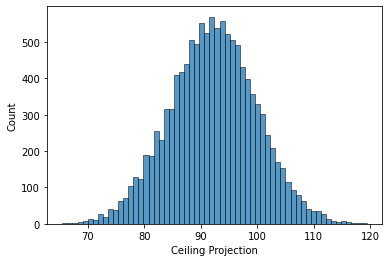

In [13]:
sns.histplot(data=lineups_df, x='Ceiling Projection')

In [14]:
lineups_df['Ceiling Projection'].describe()

count    11800.000000
mean        92.164212
std          7.639054
min         65.500000
25%         87.000000
50%         92.200000
75%         97.300000
max        119.400000
Name: Ceiling Projection, dtype: float64

<AxesSubplot:xlabel='Ownership', ylabel='Count'>

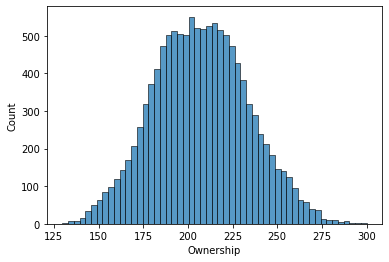

In [15]:
sns.histplot(data=lineups_df, x='Ownership')

In [16]:
lineups_df['Ownership'].describe()

count    11800.000000
mean       207.154470
std         26.376255
min        129.700000
25%        188.400000
50%        206.650000
75%        225.150000
max        300.050000
Name: Ownership, dtype: float64